# Single Decision Tree
CS109 Final Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
%matplotlib inline

In [2]:
df = pd.read_csv('age_dataset.csv', sep='\t')
del df['Unnamed: 0']

In [3]:
print(df.columns, df.isnull().sum(axis=0).tolist())

Index(['FIRST_NAME', 'GEN16', 'LAST_NAME', 'district', 'dob', 'electiondate',
       'female', 'id', 'party', 'regyear', 'typeofvote', 'zip', 'Prediction',
       'Race', 'age'],
      dtype='object') [2, 0, 2, 0, 431, 16297, 10, 0, 0, 0, 16297, 5, 2, 0, 431]


In [4]:
df['femaleis1'] = 0
df.loc[(df['female'] == "F"),'femaleis1'] = "1"

remove = ['FIRST_NAME', 'LAST_NAME', 'dob', 'electiondate',
       'female', 'id', 'regyear', 'typeofvote', 'zip']
        
df.drop(remove, axis = 1, inplace = True)

In [5]:
df = df.dropna()
df.head()

,GEN16,district,party,Prediction,Race,age,femaleis1
0,1.0,MRT,REP,Jewish,5,67.0,0
1,1.0,CLA,REP,Western European,5,35.0,1
2,0.0,HIL,DEM,Western European,3,20.0,0
3,1.0,MON,NPA,Western European,5,43.0,0
4,1.0,BAK,REP,Western European,5,52.0,0


In [6]:
df.isnull().sum(axis=0).tolist()

[0, 0, 0, 0, 0, 0, 0]

In [7]:
# Create dummies
df = pd.get_dummies(df, columns=['district','party', 'Prediction', 'Race'], drop_first=True)

In [8]:
# Train/test split
msk = np.random.rand(len(df)) < 0.5
train = df[msk]
test = df[~msk]

print ("Total Sample:", len (df))
print ("Test Sample:", len(test))
print ("Train Sample:", len(train))

Total Sample: 99567
Test Sample: 49713
Train Sample: 49854


In [9]:
# Create X and y split
X_train = train.iloc[:, train.columns != 'GEN16']
y_train = train['GEN16']
X_test = test.iloc[:, test.columns != 'GEN16']
y_test = test['GEN16']

### Single Decision Tree

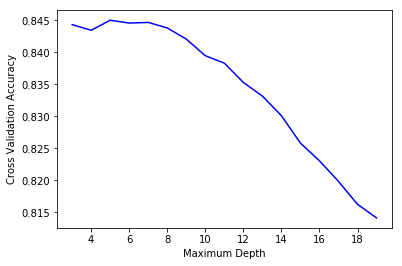

In [10]:
# Fit decision tree
depth = []
tree_start = 3
tree_end = 20
for i in range(tree_start,tree_end):
    dt = DecisionTreeClassifier(max_depth=i)
    # Perform 5-fold cross-validation
    scores = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=5, n_jobs=-1)
    depth.append((i, scores.mean()))
plt.plot(np.array(depth)[:,0], np.array(depth)[:,1], 'b-')
plt.ylabel("Cross Validation Accuracy")
plt.xlabel("Maximum Depth")
plt.show()

In [11]:
# Determine maximum tree depth
max_depth = np.argmax(np.array(depth)[:,1]) + tree_start
max_depth

5

In [12]:
# Determine accuracy on train and test set
dt = DecisionTreeClassifier(max_depth=max_depth)
dt_fitted = dt.fit(X_train, y_train)
print("Test Accuracy:", dt_fitted.score(X_train, y_train))
print("Test Accuracy:", dt_fitted.score(X_test, y_test))

Test Accuracy: 0.846331287359
Test Accuracy: 0.848148371653
